<a href="https://colab.research.google.com/github/Dollyp1205/Marketing-Research-Methods---Dolly-Poddar--Jio-Institute/blob/Group-Assignment/Quesion_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                        customer_id                          order_id  \
0  00012a2ce6f8dcda20d059ce98491703  5f79b5b0931d63f1a42989eb65b9da6e   
1  000161a058600d5901f007fab4c27140  a44895d095d7e0702b6a162fa2dbeced   
2  0001fd6190edaaf884bcaf3d49edf079  316a104623542e4d75189bb372bc5f8d   
3  0002414f95344307404f0ace7a26f1d5  5825ce2e88d5346438686b0bba99e5ee   
4  000379cdec625522490c315e70c7a9fb  0ab7fb08086d4af9141453c91878ed7a   
5  0004164d20a9e969af783496f3408652  cd3558a10d854487b4f907e9b326a4fc   
6  000419c5494106c306a97b5635748086  07f6c3baf9ac86865b60f640c4f923c6   
7  00046a560d407e99b969756e0b10f282  8c3d752c5c02227878fae49aeaddbfd7   
8  00050bf6e01e69d5c0fd612f1bcfb69c  fa906f338cee30a984d0945b3832e431   
9  000598caf2ef4117407665ac33275130  9b961b894e797f63622137ff7eb1c1af   

     price  moving_avg  
0    89.80       89.80  
1    54.90       54.90  
2   179.99      179.99  
3   149.90      149.90  
4    93.00       93.00  
5    59.99       59.99  
6    34.30       34.3

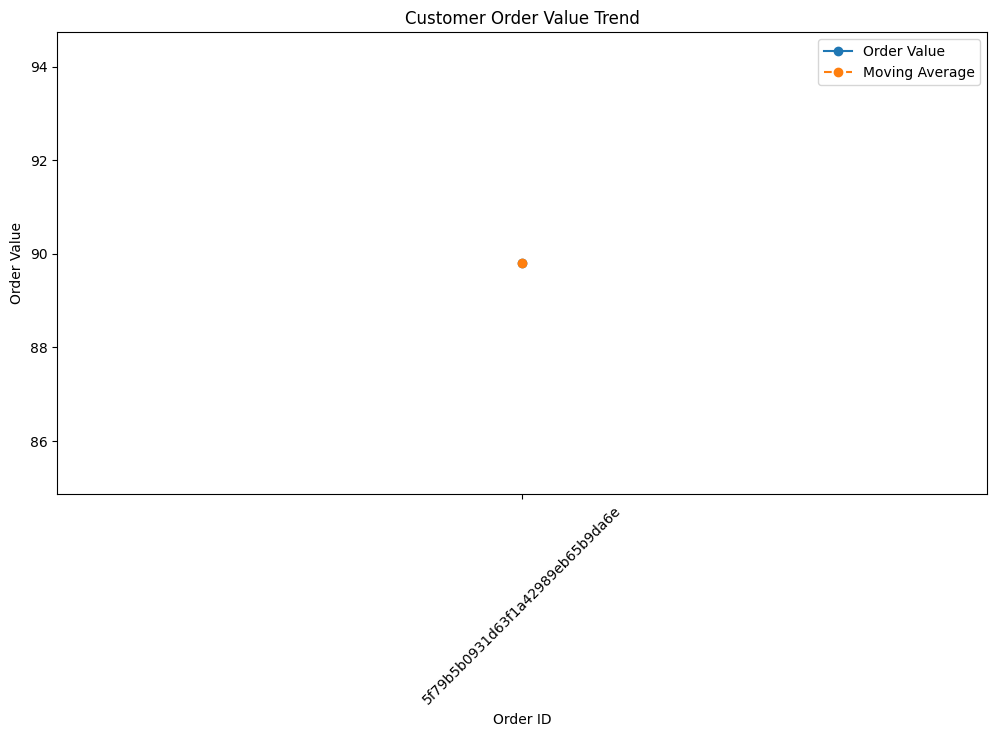

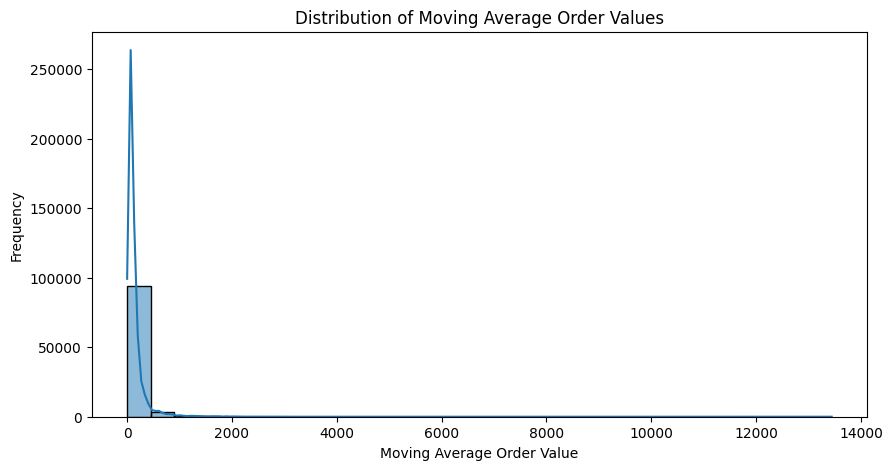

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/customers.csv')
orders = pd.read_csv('/content/orders (1).csv')
order_items = pd.read_csv('/content/order_items.csv')

# Merge customers with orders
customer_orders = customers.merge(orders, on='customer_id', how='inner')

# Merge with order items to get order value
customer_orders = customer_orders.merge(order_items, on='order_id', how='inner')

# Calculate total order value per order
order_values = customer_orders.groupby(['customer_id', 'order_id'])['price'].sum().reset_index()

# Compute moving average (window size = 3 for recent trends)
order_values['moving_avg'] = order_values.groupby('customer_id')['price'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Display sample of results
print(order_values.head(10))

# Visualization: Moving Average of Order Values for a Sample Customer
sample_customer = order_values[order_values['customer_id'] == order_values['customer_id'].iloc[0]]
plt.figure(figsize=(12, 6))
plt.plot(sample_customer['order_id'], sample_customer['price'], marker='o', label='Order Value')
plt.plot(sample_customer['order_id'], sample_customer['moving_avg'], marker='o', linestyle='dashed', label='Moving Average')
plt.xlabel('Order ID')
plt.ylabel('Order Value')
plt.title('Customer Order Value Trend')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Distribution of moving average order values across customers
plt.figure(figsize=(10, 5))
sns.histplot(order_values['moving_avg'], bins=30, kde=True)
plt.title('Distribution of Moving Average Order Values')
plt.xlabel('Moving Average Order Value')
plt.ylabel('Frequency')
plt.show()